<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Heat Map

In [2]:
# Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={"figure.figsize": (6, 6)})
np.random.seed(sum(map(ord, "palettes")))

In [3]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [4]:
#Laden der Trainings- und Testdaten
df = np.load(file='exchange/hr_01_cleaned_train.pkl')

In [5]:
#Verschieben von hasLeftCompany an die erste Stelle, für eine bessere Visualisierung
front= df['hasLeftCompany']
df.drop(labels=['hasLeftCompany'], axis=1,inplace=True)
df.insert(0,'hasLeftCompany',front)

for col in ['workAccident', 'hasLeftCompany', 'gotPromotion']:
    df[col]=df[col].astype('int64')
    

## Correlation Matrix

,hasLeftCompany,satisfactionLevel,yearsSinceEvaluation,numberOfProjects,averageMonthlyHours,yearsAtCompany,workAccident,gotPromotion
hasLeftCompany,1.000000,-0.380088,0.007028,0.022109,0.075262,0.150889,-0.157683,-0.058816
satisfactionLevel,-0.380088,1.000000,0.108157,-0.142468,-0.009289,-0.098065,0.056196,0.028157
yearsSinceEvaluation,0.007028,0.108157,1.000000,0.339897,0.335912,0.130818,-0.008613,-0.010050
numberOfProjects,0.022109,-0.142468,0.339897,1.000000,0.417742,0.191711,-0.003372,-0.006975
averageMonthlyHours,0.075262,-0.009289,0.335912,0.417742,1.000000,0.122529,-0.016674,-0.006599
yearsAtCompany,0.150889,-0.098065,0.130818,0.191711,0.122529,1.000000,-0.012271,0.059403
workAccident,-0.157683,0.056196,-0.008613,-0.003372,-0.016674,-0.012271,1.000000,0.032564
gotPromotion,-0.058816,0.028157,-0.010050,-0.006975,-0.006599,0.059403,0.032564,1.000000


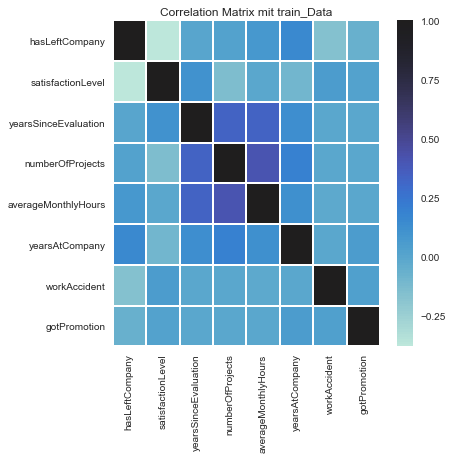

In [6]:
#Correlation Matrix mit train_Data
corr = df.corr()
corr = (corr)
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
            linewidths=1, center =True).set_title('Correlation Matrix mit train_Data');
corr


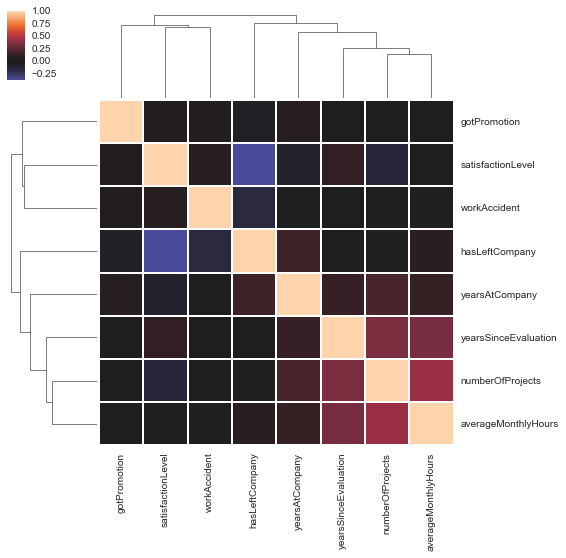

In [10]:
#Clustergrid mit train_Data
#sns.palplot(sns.color_palette("Set2", 10))

sns.clustermap(df.corr(), center =0, cmap=pal,
                linewidths=1, figsize=(8, 8));

# Erstes Fazit
#### Höchste Correlation mit 0.413287 zwischen numberOfProjects und averageMonthlyHours
#####                         0.352554 yearsSinceEvaluation und numberOfProjects
####                         0.341156 yearsSinceEvaluation und averageMonthlyHours
#### -> Vermutung mehr Stunden und mehr Projekte steigert die Chance für eine Bewertung